In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
_PATH_ = "https://public.minsky.cc/maria/market_channel_factors_db"

In [3]:
df = pd.read_csv(_PATH_ + "/" + "model/02ModelDataframeOfWhitePotato.csv")

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.columns

Index(['NOMBREDD', 'NOMBREPV', 'NOMBREDI', 'CONGLOMERADO', 'NSELUA', 'UA',
       'percentSoldProduction', 'percentFarmGateIncomes', 'percentPlantedArea',
       'districtTimeToLimaMarket', 'districtTimeToProvinceCapitalOfRegion',
       'provinceCapitalToLimaMarket', 'informalPriceInformation',
       'formalPriceInformation', 'informalMetereologicalInformation',
       'formalMetereologicalInformation', 'volumeOfDistrict', 'soldProduction',
       'yield', 'associative', 'pointsOfSale', 'marketSize',
       'simplifiedMarketChannelDirectedness', 'farmGatePricePerKg'],
      dtype='object')

# Agricultural units

In [6]:
def histogramPlot(df, variable):
    sns.set(style="white", palette="muted", color_codes=True)
    rs = np.random.RandomState(10)

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    # Generate a random univariate dataset
    d = df[variable]

    # Plot a simple histogram with binsize determined automatically
    sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

    # Plot a kernel density estimate and rug plot
    sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

    # Plot a filled kernel density estimate
    sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

    # Plot a histogram and kernel density estimate
    sns.distplot(d, color="m", ax=axes[1, 1])

    plt.setp(axes, yticks=[])
    plt.tight_layout()

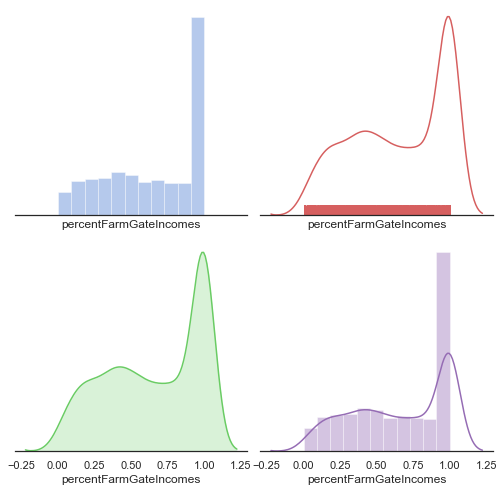

In [7]:
histogramPlot(df, "percentFarmGateIncomes")

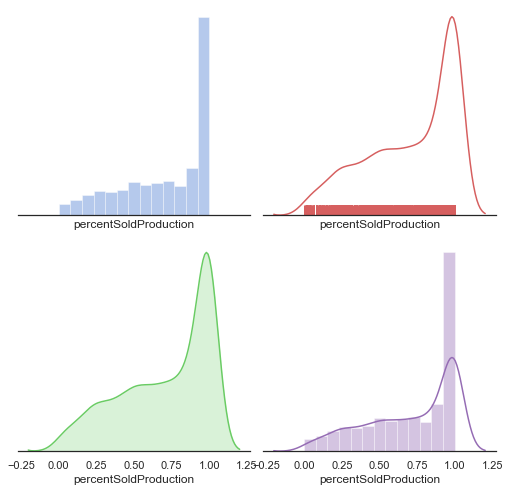

In [8]:
histogramPlot(df, "percentSoldProduction")

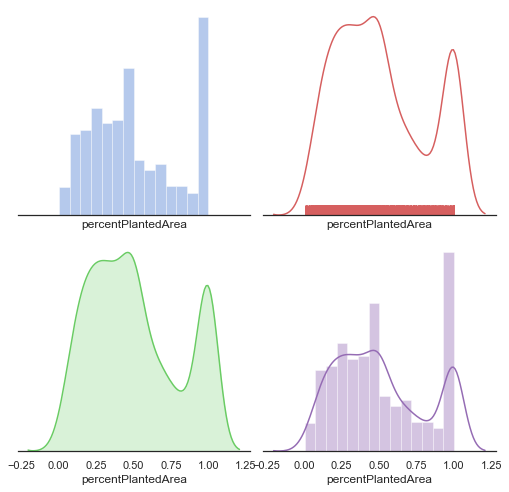

In [9]:
histogramPlot(df, "percentPlantedArea")

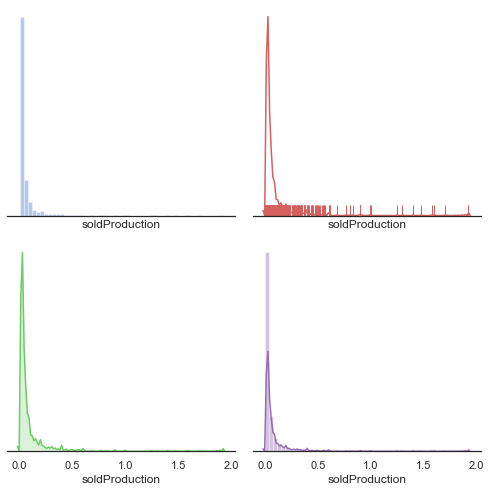

In [10]:
histogramPlot(df, "soldProduction")

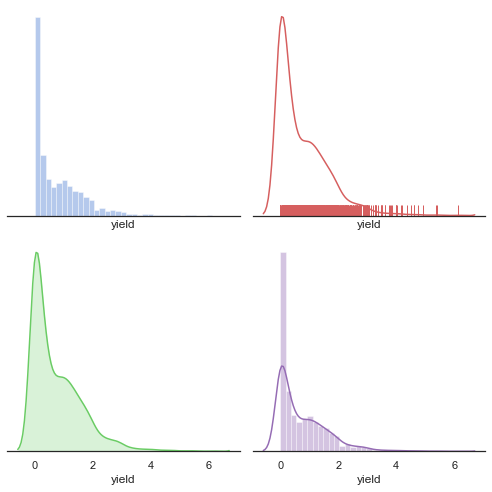

In [11]:
histogramPlot(df, "yield")

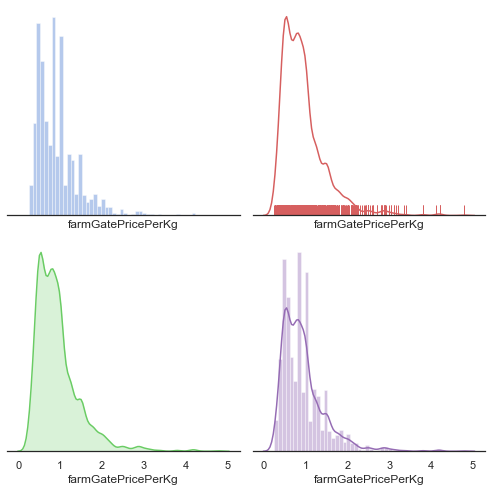

In [12]:
histogramPlot(df, "farmGatePricePerKg")

# Descriptive analysis

In [13]:
def plotingPercentageHistogram(variable, xName, yName):
    dfColumn = df[variable] * 100
    dfColumn.plot.hist(grid=True, bins=20, rwidth=0.9,
                    color='#4a4a4a')
    plt.xlabel(xName)
    plt.ylabel(yName)
    plt.rcParams["font.family"] = "serif"
    plt.grid(axis='y', alpha=0.75)

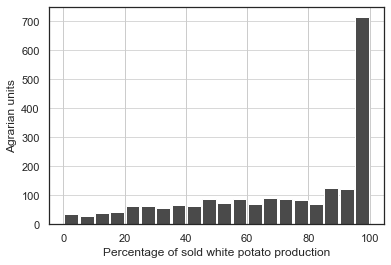

In [14]:
plotingPercentageHistogram("percentSoldProduction", "Percentage of sold white potato production", "Agrarian units")

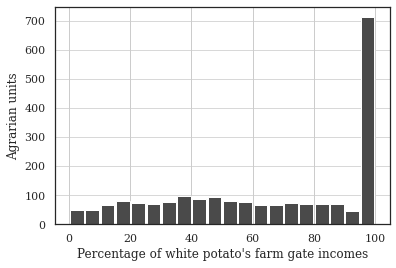

In [15]:
plotingPercentageHistogram("percentFarmGateIncomes", "Percentage of white potato's farm gate incomes", "Agrarian units")

In [16]:
df["simplifiedMarketChannelDirectednessString"] = df["simplifiedMarketChannelDirectedness"].map({1: "Indirect", 2: "Direct"})
df["marketSizeString"] = df["marketSize"].map({1: "Local market", 2: "Regional market", 3: "Lima markets"})

In [17]:
def boxPlotMultiple(x, y, yName, orderedList):
    ax = sns.boxplot(x=x, y=y, data=df, color='.50', order=orderedList)
    plt.xlabel("")
    plt.ylabel(yName)
    plt.rcParams["font.family"] = "serif"
    plt.grid(axis='y', alpha=0.75)

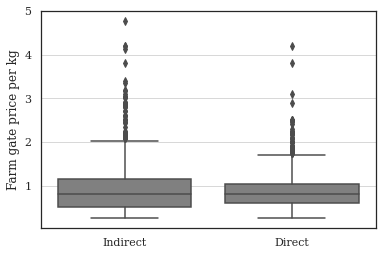

In [33]:
boxPlotMultiple("simplifiedMarketChannelDirectednessString", "farmGatePricePerKg", "Farm gate price per kg", ["Indirect", "Direct"])

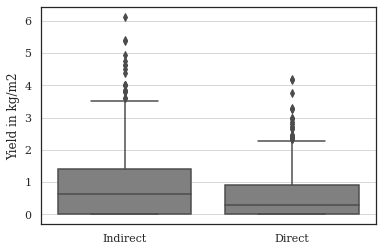

In [18]:
boxPlotMultiple("simplifiedMarketChannelDirectednessString", "yield", "Yield in kg/m2", ["Indirect", "Direct"])

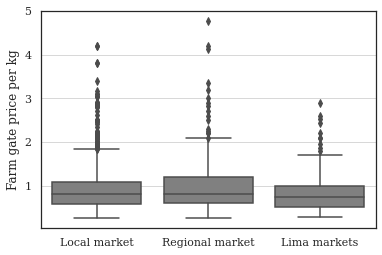

In [34]:
boxPlotMultiple("marketSizeString", "farmGatePricePerKg", "Farm gate price per kg", ["Local market", "Regional market", "Lima markets"])

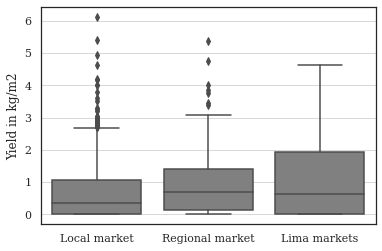

In [19]:
boxPlotMultiple("marketSizeString", "yield", "Yield in kg/m2", ["Local market", "Regional market", "Lima markets"])

In [37]:
def barPlotCountMultiple(variable, orderedList):
    ax = sns.barplot(x=df[variable].value_counts().keys(), y=df[variable].value_counts(), data=df, color='#4a4a4a', order=orderedList)
    #plt.bar(, df[variable].value_counts(), color='#4a4a4a', order=["Collector", "Wholesaler"])
    plt.xlabel("")
    plt.ylabel("Agrarian units")
    plt.rcParams["font.family"] = "serif"

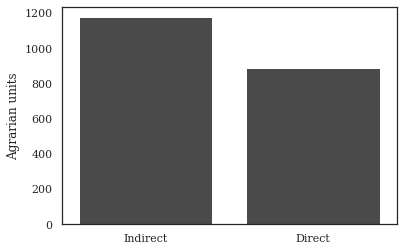

In [38]:
barPlotCountMultiple("simplifiedMarketChannelDirectednessString", ["Indirect", "Direct"])

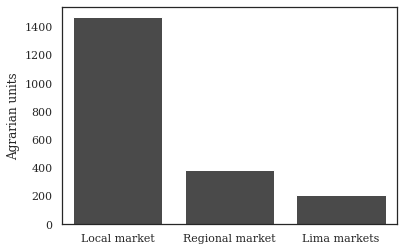

In [39]:
barPlotCountMultiple("marketSizeString", ["Local market", "Regional market", "Lima markets"])

In [26]:
df.groupby(["marketSize", "simplifiedMarketChannelDirectednessString"])["farmGatePricePerKg"].mean()

marketSize  simplifiedMarketChannelDirectednessString
1           Direct                                       0.923884
            Indirect                                     0.938494
2           Direct                                       0.920474
            Indirect                                     1.006629
3           Direct                                       0.859392
            Indirect                                     0.836996
Name: farmGatePricePerKg, dtype: float64

In [27]:
df["farmIncomes"] = df["farmGatePricePerKg"] * df["soldProduction"] * 100000
df_mean = df.groupby(["marketSizeString", "simplifiedMarketChannelDirectednessString"]).mean()

In [28]:
# counts
df.groupby(["marketSizeString", "simplifiedMarketChannelDirectednessString"]).count()["farmGatePricePerKg"]

marketSizeString  simplifiedMarketChannelDirectednessString
Lima markets      Direct                                        41
                  Indirect                                     168
Local market      Direct                                       757
                  Indirect                                     712
Regional market   Direct                                        90
                  Indirect                                     296
Name: farmGatePricePerKg, dtype: int64

In [29]:
# soles
df_mean["farmGatePricePerKg"]

marketSizeString  simplifiedMarketChannelDirectednessString
Lima markets      Direct                                       0.859392
                  Indirect                                     0.836996
Local market      Direct                                       0.923884
                  Indirect                                     0.938494
Regional market   Direct                                       0.920474
                  Indirect                                     1.006629
Name: farmGatePricePerKg, dtype: float64

In [30]:
# in tons
df_mean["soldProduction"] * 100

marketSizeString  simplifiedMarketChannelDirectednessString
Lima markets      Direct                                        8.173512
                  Indirect                                     16.941071
Local market      Direct                                        1.960117
                  Indirect                                      5.306805
Regional market   Direct                                        3.556744
                  Indirect                                      7.721520
Name: soldProduction, dtype: float64

In [31]:
# in tons
df_mean["farmIncomes"]

marketSizeString  simplifiedMarketChannelDirectednessString
Lima markets      Direct                                        8403.682927
                  Indirect                                     18029.974405
Local market      Direct                                        1911.320376
                  Indirect                                      5277.097566
Regional market   Direct                                        4295.052850
                  Indirect                                      9053.172325
Name: farmIncomes, dtype: float64